## 1- Analysis of ally heroes and enemy heroes

In [8]:
import pandas as pd
import os
import glob
from collections import defaultdict

# Initialize dictionaries to store win/loss counts and total matches
ally_wins = defaultdict(int)
ally_total = defaultdict(int)
enemy_wins = defaultdict(int)
enemy_total = defaultdict(int)

# Path to the directory containing match CSV files
match_dir = "data/parsed_data/my_matches_csv"
csv_files = glob.glob(os.path.join(match_dir, "*.csv"))

# Process each file
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    match_data = pd.read_csv(csv_file)
    # Process each row in the CSV
    for _, row in match_data.iterrows():
        # Determine if the player won
        player_win = row['player_win']

        # Update ally stats
        for ally_column in ['A1', 'A2', 'A3', 'A4']:
            hero_id = int(row[ally_column])
            if pd.notna(hero_id):  # Check if the hero ID is valid
                ally_total[hero_id] += 1
                if player_win == 1:  # If the player won, allies also win
                    ally_wins[hero_id] += 1

        # Update enemy stats
        for enemy_column in ['E1', 'E2', 'E3', 'E4', 'E5']:
            hero_id = row[enemy_column]
            if pd.notna(hero_id):  # Check if the hero ID is valid
                enemy_total[hero_id] += 1
                if player_win == 0:  # If the player lost, opponents win
                    enemy_wins[hero_id] += 1


# Calculate win percentages
ally_win_percentages = {hero_id: (ally_wins[hero_id] / ally_total[hero_id]) * 100 for hero_id in ally_total}
enemy_win_percentages = {hero_id: (enemy_wins[hero_id] / enemy_total[hero_id]) * 100 for hero_id in enemy_total}

# Create DataFrame including the total matches
win_percentages_df = pd.DataFrame({
    'Hero ID': list(ally_win_percentages.keys()),
    'Win % as Ally': list(ally_win_percentages.values()),
    'Ally Matches': [ally_total[hero_id] for hero_id in ally_win_percentages.keys()],
    'Win % as Opponent': [enemy_win_percentages.get(hero_id, 0) for hero_id in ally_win_percentages.keys()],
    'Enemy Matches': [enemy_total.get(hero_id, 0) for hero_id in ally_win_percentages.keys()]
})

# Save the DataFrame to the specified directory
output_dir = "data/visualization_purposes"
output_csv = os.path.join(output_dir, "hero_win_percentages.csv")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame
win_percentages_df.to_csv(output_csv, index=False)

# Print a preview of the DataFrame
print(win_percentages_df.head())


Processing file: data/parsed_data/my_matches_csv/my_matches_batch_2.csv
Processing file: data/parsed_data/my_matches_csv/my_matches_batch_1.csv
   Hero ID  Win % as Ally  Ally Matches  Win % as Opponent  Enemy Matches
0       35      62.857143            35          52.272727             44
1       12      28.571429             7          47.619048             21
2        7      30.769231            13          63.636364             11
3      104      50.000000            20          50.000000             30
4       42      55.882353            34          48.148148             27


In [3]:
# Normalize ally matches by dividing by 4
normalized_ally_matches = {hero_id: count / 4 for hero_id, count in ally_total.items()}

# Normalize enemy matches by dividing by 5
normalized_enemy_matches = {hero_id: count / 5 for hero_id, count in enemy_total.items()}

# Create updated DataFrame with normalized matches
win_percentages_df_modified = pd.DataFrame({
    'Hero ID': list(ally_win_percentages.keys()),
    'Win % as Ally': list(ally_win_percentages.values()),
    'Ally Matches (Normalized)': [normalized_ally_matches.get(hero_id, 0) for hero_id in ally_win_percentages.keys()],
    'Win % as Opponent': [enemy_win_percentages.get(hero_id, 0) for hero_id in ally_win_percentages.keys()],
    'Enemy Matches (Normalized)': [normalized_enemy_matches.get(hero_id, 0) for hero_id in ally_win_percentages.keys()]
})


/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_95585/3321136339.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hero ID', y='Ally Matches (Normalized)', data=win_percentages_df_modified, palette='viridis')


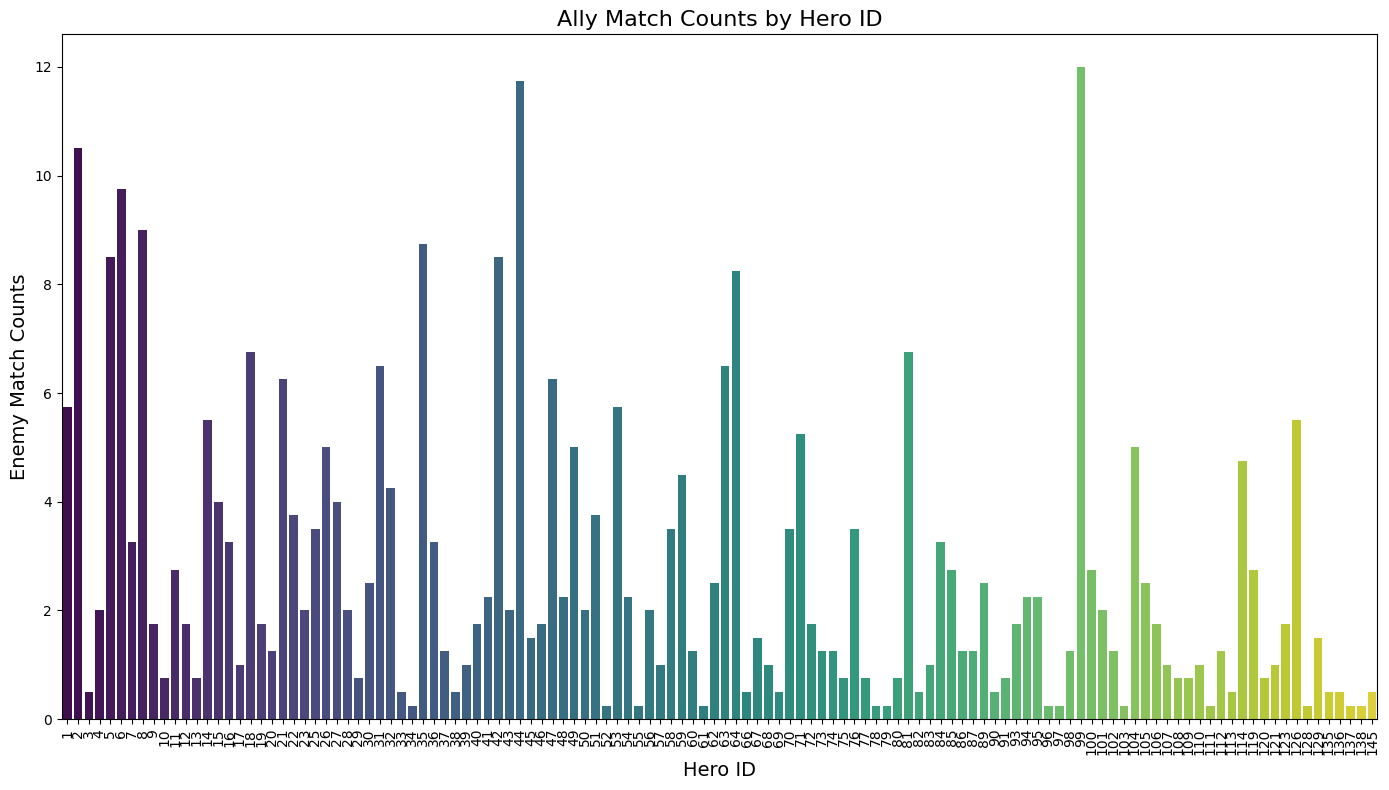

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert Hero ID to categorical type for better visualization
win_percentages_df_modified['Hero ID'] = win_percentages_df_modified['Hero ID'].astype('category')

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Hero ID', y='Ally Matches (Normalized)', data=win_percentages_df_modified, palette='viridis')

# Add labels and title
plt.title('Ally Match Counts by Hero ID', fontsize=16)
plt.xlabel('Hero ID', fontsize=14)
plt.ylabel('Enemy Match Counts', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_95585/3889971842.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hero ID', y='Enemy Matches (Normalized)', data=win_percentages_df_modified, palette='viridis')


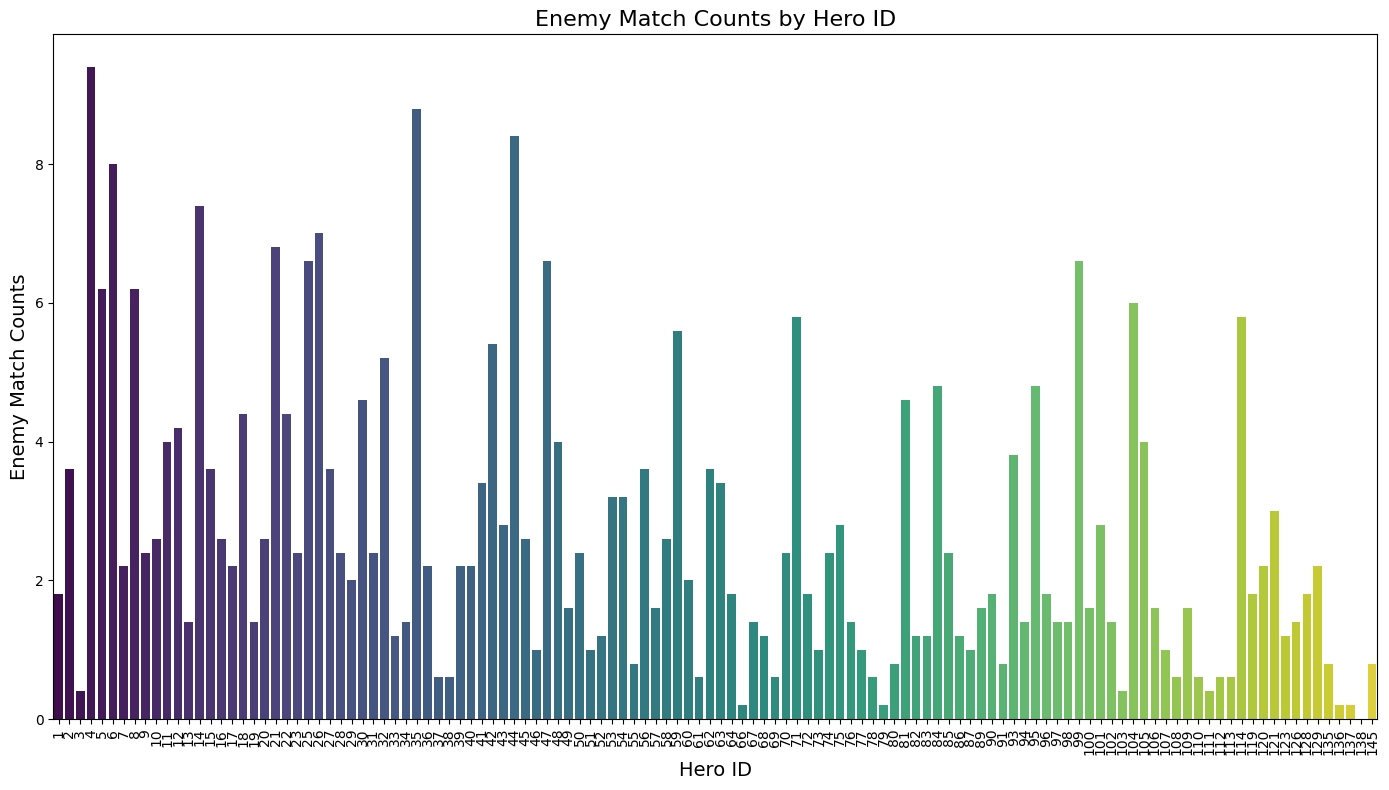

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Hero ID to categorical type for better visualization
win_percentages_df_modified['Hero ID'] = win_percentages_df_modified['Hero ID'].astype('category')

# Plot the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x=['Enemy Heroes'] * len(win_percentages_df_modified), y='Enemy Matches (Normalized)', data=win_percentages_df_modified, palette='viridis')

# Add labels and title
plt.title('Distribution of Enemy Match Counts', fontsize=16)
plt.xlabel('Enemy Heroes', fontsize=14)
plt.ylabel('Enemy Match Counts (Normalized)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_96698/196160320.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin_plot = sns.violinplot(x='Team', y='Matches (Normalized)', data=plot_df, palette='viridis')


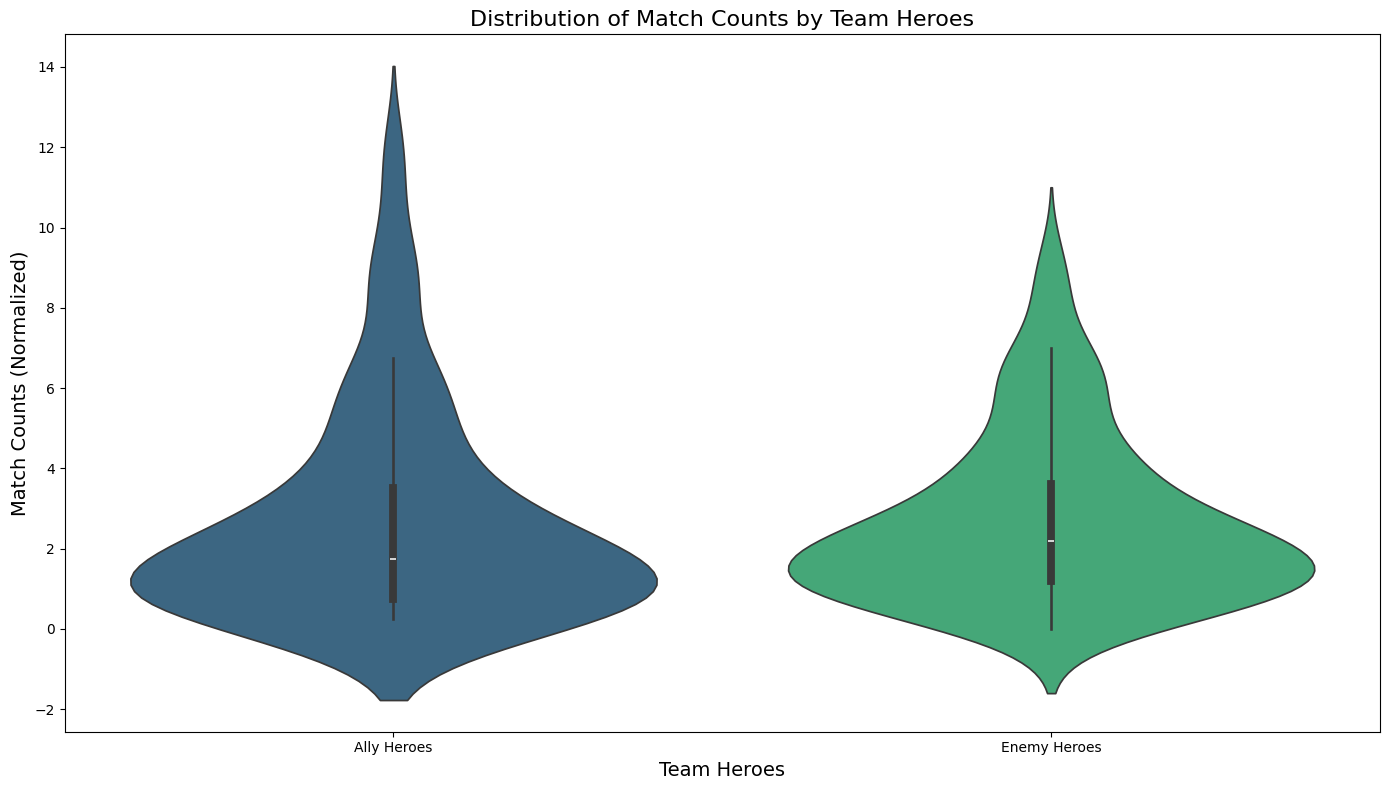

Statistics for Ally Heroes:
  Mean: 2.69
  Median: 1.75
  Standard Deviation: 2.65
  Min: 0.25
  Max: 12.00

Statistics for Enemy Heroes:
  Mean: 2.67
  Median: 2.20
  Standard Deviation: 2.09
  Min: 0.00
  Max: 9.40



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Hero ID to categorical type for better visualization
win_percentages_df_modified['Hero ID'] = win_percentages_df_modified['Hero ID'].astype('category')

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Hero ID': list(win_percentages_df_modified['Hero ID']) * 2,
    'Matches (Normalized)': list(win_percentages_df_modified['Ally Matches (Normalized)']) + list(win_percentages_df_modified['Enemy Matches (Normalized)']),
    'Team': ['Ally Heroes'] * len(win_percentages_df_modified) + ['Enemy Heroes'] * len(win_percentages_df_modified)
})

# Plot the violin plot
plt.figure(figsize=(14, 8))
violin_plot = sns.violinplot(x='Team', y='Matches (Normalized)', data=plot_df, palette='viridis')

# Add labels and title
plt.title('Distribution of Match Counts by Team Heroes', fontsize=16)
plt.xlabel('Team Heroes', fontsize=14)
plt.ylabel('Match Counts (Normalized)', fontsize=14)

# Save the plot to the specified directory
output_dir = "data/visuals"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "match_counts_violin_plot.png"))

# Show the plot
plt.tight_layout()
plt.show()

# Extract and print important points from the violin plot
for team in plot_df['Team'].unique():
    team_data = plot_df[plot_df['Team'] == team]['Matches (Normalized)']
    print(f"Statistics for {team}:")
    print(f"  Mean: {team_data.mean():.2f}")
    print(f"  Median: {team_data.median():.2f}")
    print(f"  Standard Deviation: {team_data.std():.2f}")
    print(f"  Min: {team_data.min():.2f}")
    print(f"  Max: {team_data.max():.2f}")
    print()


In [6]:
from scipy.stats import ttest_ind
from scipy.stats import f


ally_match_counts = win_percentages_df_modified['Ally Matches (Normalized)']
enemy_match_counts = win_percentages_df_modified['Enemy Matches (Normalized)']

# Variance Analysis using F-test
var_ally = ally_match_counts.var()
var_enemy = enemy_match_counts.var()
f_stat = var_ally / var_enemy
df_ally = len(ally_match_counts) - 1
df_enemy = len(enemy_match_counts) - 1
var_p_value = 1 - f.cdf(f_stat, df_ally, df_enemy)

# Calculate and print means for ally and enemy match counts
ally_mean = ally_match_counts.mean()
enemy_mean = enemy_match_counts.mean()

print("Means of Match Counts")
print(f"Mean Ally Match Count: {ally_mean:.2f}")
print(f"Mean Enemy Match Count: {enemy_mean:.2f}")

# Perform an independent t-test to compare means
t_stat, p_value = ttest_ind(ally_match_counts, enemy_match_counts, equal_var=False, alternative='greater')

# Display results
print("\nIndependent t-test for Mean Comparison")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Check if we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis H0: The means of ally hero match counts and enemy hero match counts are equal.\n")
    print("Alternative hypothesis H1: The mean of ally hero match counts is greater than the mean of enemy hero match counts.\n")
else:
    print("We fail to reject the null hypothesis H0: The means of ally hero match counts and enemy hero match counts are equal.\n")

# Results
print("Variance Analysis (F-test for Match Counts)")
print(f"F-statistic: {f_stat:.4f}, p-value: {var_p_value:.4f}")

if var_p_value < 0.05:
    print("We reject the null hypothesis H0, There is variability difference between ally and enemy match counts.")
else:
    print("We fail to reject the null hypothesis H0, There is no variability difference between ally and enemy match counts.")



Means of Match Counts
Mean Ally Match Count: 2.69
Mean Enemy Match Count: 2.67

Independent t-test for Mean Comparison
t-statistic: 0.0644, p-value: 0.4743
We fail to reject the null hypothesis H0: The means of ally hero match counts and enemy hero match counts are equal.

Variance Analysis (F-test for Match Counts)
F-statistic: 1.5959, p-value: 0.0053
We reject the null hypothesis H0, There is variability difference between ally and enemy match counts.


In [147]:
from scipy.stats import f

# Extract Ally and Enemy win percentages
ally_win_percentages = win_percentages_df_modified["Win % as Ally"]
enemy_win_percentages = win_percentages_df_modified["Win % as Opponent"]

# Variance Analysis using F-test
var_ally = ally_win_percentages.var()
var_enemy = enemy_win_percentages.var()
f_stat = var_ally / var_enemy
df_ally = len(ally_win_percentages) - 1
df_enemy = len(enemy_win_percentages) - 1
var_p_value = 1 - f.cdf(f_stat, df_ally, df_enemy)

# Mean Analysis using Independent t-test
mean_stat, mean_p_value = ttest_ind(enemy_win_percentages, ally_win_percentages, equal_var=False, alternative='greater')

# Calculate means for Ally and Enemy win percentages
ally_win_mean = ally_win_percentages.mean()
enemy_win_mean = enemy_win_percentages.mean()

# Results
print("Variance Analysis (F-test for Win Percentages)")
print(f"F-statistic: {f_stat:.4f}, p-value: {var_p_value:.4f}")
if var_p_value < 0.05:
    print("We reject the null hypothesis H0, There is variability difference between ally and enemy win percentages.\n")
else:
    print("We fail to reject the null hypothesis H0, There is no variability difference between ally and enemy win percentages.'\n")

print("Mean Analysis (Independent t-test for Win Percentages)")
print(f"Mean Ally Win Percentage: {ally_win_mean:.2f}%")
print(f"Mean Enemy Win Percentage: {enemy_win_mean:.2f}%")
print(f"t-statistic: {mean_stat:.4f}, p-value: {mean_p_value:.4f}")
if mean_p_value < 0.05:
    print("We reject the null hypothesis H0, The mean of enemy win percentages is greater than mean of ally win percentages.")
else:
    print("We fail to reject the null hypothesis H0: 'The means of ally and enemy win percentages are equal.'")


Variance Analysis (F-test for Win Percentages)
F-statistic: 1.4445, p-value: 0.0221
We reject the null hypothesis H0, There is variability difference between ally and enemy win percentages.

Mean Analysis (Independent t-test for Win Percentages)
Mean Ally Win Percentage: 42.89%
Mean Enemy Win Percentage: 57.82%
t-statistic: 5.4582, p-value: 0.0000
We reject the null hypothesis H0, The mean of ally win percentages is greater than mean of enemy win percentages.


/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_95585/2510420544.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin_plot = sns.violinplot(x='Team', y='Win Percentage', data=plot_df, palette='viridis')


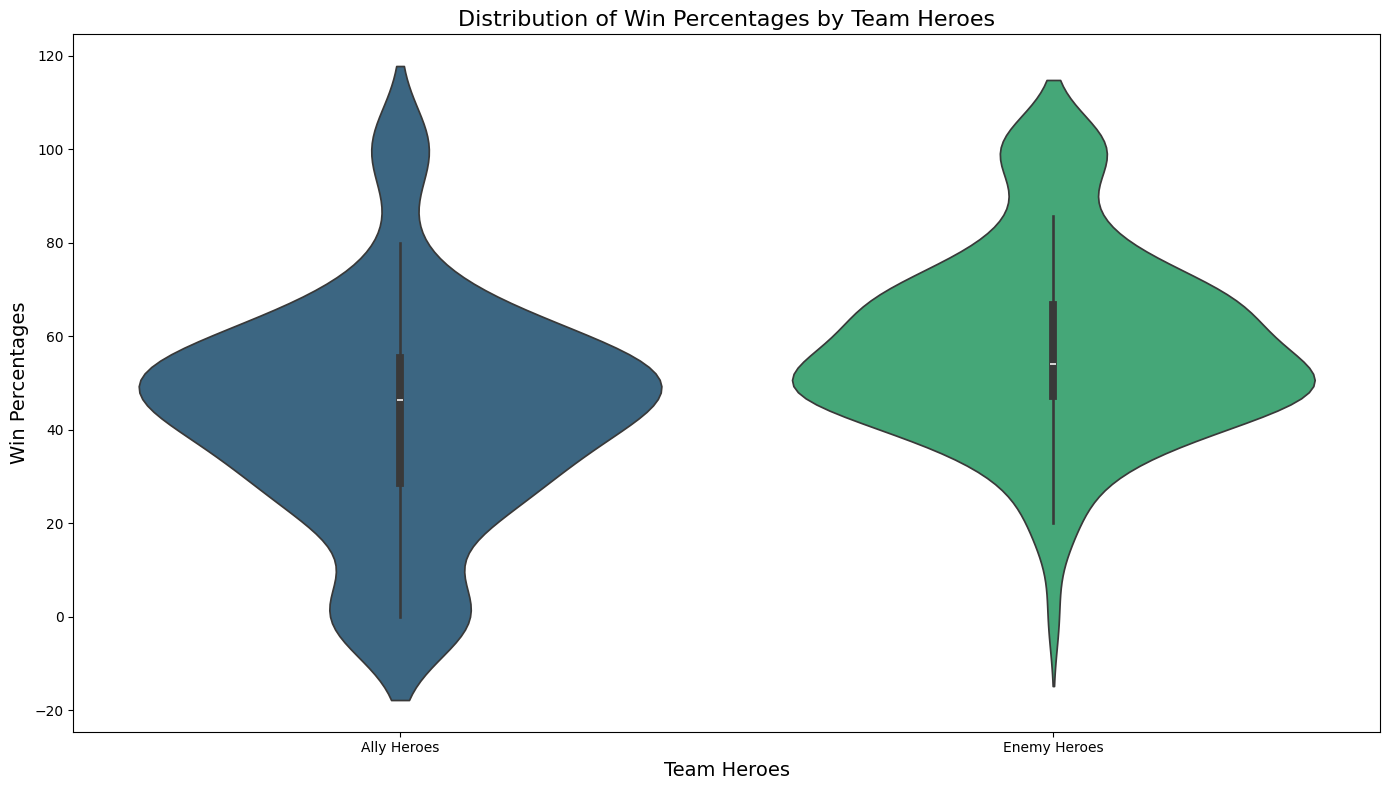

Statistics for Ally Heroes:
  Mean: 42.89
  Median: 46.41
  Standard Deviation: 23.22
  Min: 0.00
  Max: 100.00

Statistics for Enemy Heroes:
  Mean: 57.82
  Median: 54.01
  Standard Deviation: 19.32
  Min: 0.00
  Max: 100.00



In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Hero ID to categorical type for better visualization
win_percentages_df_modified['Hero ID'] = win_percentages_df_modified['Hero ID'].astype('category')

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Hero ID': list(win_percentages_df_modified['Hero ID']) * 2,
    'Win Percentage': list(win_percentages_df_modified['Win % as Ally']) + list(win_percentages_df_modified['Win % as Opponent']),
    'Team': ['Ally Heroes'] * len(win_percentages_df_modified) + ['Enemy Heroes'] * len(win_percentages_df_modified)
})

# Plot the violin plot
plt.figure(figsize=(14, 8))
violin_plot = sns.violinplot(x='Team', y='Win Percentage', data=plot_df, palette='viridis')

# Add labels and title
plt.title('Distribution of Win Percentages by Team Heroes', fontsize=16)
plt.xlabel('Team Heroes', fontsize=14)
plt.ylabel('Win Percentages', fontsize=14)

# Save the plot to the specified directory
output_dir = "data/visuals"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "win_percentages_violin_plot.png"))

# Show the plot
plt.tight_layout()
plt.show()

# Extract and print important points from the violin plot
for team in plot_df['Team'].unique():
    team_data = plot_df[plot_df['Team'] == team]['Win Percentage']
    print(f"Statistics for {team}:")
    print(f"  Mean: {team_data.mean():.2f}")
    print(f"  Median: {team_data.median():.2f}")
    print(f"  Standard Deviation: {team_data.std():.2f}")
    print(f"  Min: {team_data.min():.2f}")
    print(f"  Max: {team_data.max():.2f}")
    print()


## 2- Performance gain analysis for played heroes

In [9]:
import pandas as pd
import os
import glob

# Path to the directory containing match CSV files
match_dir = "data/parsed_data/my_matches_csv"
csv_files = glob.glob(os.path.join(match_dir, "*.csv"))

# Combine all CSV files into a single DataFrame
all_data = pd.DataFrame()
for csv_file in glob.glob(os.path.join(match_dir, "*.csv")):  # Use glob.glob to get full file paths
    print(f"Processing file: {csv_file}")
    match_data = pd.read_csv(csv_file)
    all_data = pd.concat([all_data, match_data], ignore_index=True)

# Step 1: Filter heroes with more than 5 matches
hero_counts = all_data.groupby("my_hero_id").size()
heroes_played_more_than_5 = hero_counts[hero_counts > 5].index

# Step 2: Filter data for heroes played more than 5 times (explicit copy to avoid SettingWithCopyWarning)
filtered_data = all_data[all_data["my_hero_id"].isin(heroes_played_more_than_5)].copy()

# Step 3: Add a match number column to track performance progression
filtered_data["match_number"] = filtered_data.groupby("my_hero_id").cumcount() + 1

# Save the filtered data with match number, gold_per_min, and xp_per_min into a CSV file
output_dir = "data/visualization_purposes"
output_csv = os.path.join(output_dir, "my_hero_data_with_match_numbers.csv")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the filtered data into the CSV
# Includes gold_per_min and xp_per_min columns
#filtered_data.to_csv(output_csv, index=False, columns=["my_hero_id", "match_number", "normalized_performance"])
# Load hero average performance data
hero_avg_performance_path = "data/hero_average_performance.csv"
hero_avg_performance_df = pd.read_csv(hero_avg_performance_path)

# Create a dictionary for quick lookup of average performance by hero_id
hero_avg_performance_dict = hero_avg_performance_df.set_index('Hero ID')['average_normalized_performance'].to_dict()

# Define a function to label performance as 'good' or 'bad'
def label_performance(row):
    hero_id = row['my_hero_id']
    avg_performance = hero_avg_performance_dict.get(hero_id, 0)
    return 'good' if row['normalized_performance'] > avg_performance else 'bad'

# Define a function to label result as 'win' or 'loss'
def label_game_status(row):
    return 'win' if row['player_win'] == 1 else 'loss'

# Apply the function to create a new column
filtered_data['performance_label'] = filtered_data.apply(label_performance, axis=1)
filtered_data['result'] = filtered_data.apply(label_game_status, axis=1)

# Save the updated DataFrame to the CSV file
filtered_data.to_csv(output_csv, index=False, columns=["my_hero_id", "match_number", "normalized_performance", "performance_label", "result", "gold_per_min", "xp_per_min"])

print(f"Filtered data with match numbers, gold_per_min, and xp_per_min saved to '{output_csv}'.")


Processing file: data/parsed_data/my_matches_csv/my_matches_batch_2.csv
Processing file: data/parsed_data/my_matches_csv/my_matches_batch_1.csv
Filtered data with match numbers, gold_per_min, and xp_per_min saved to 'data/visualization_purposes/my_hero_data_with_match_numbers.csv'.


In [15]:
# Filter the data for good and bad performance labels
df_contingency = filtered_data[(filtered_data["performance_label"] == "good") | (filtered_data["performance_label"] == "bad")]

# Group by match_number and performance_label, then count occurrences
df_contingency = df_contingency.groupby(by=["match_number", "performance_label"]).size().unstack()
df_contingency.fillna(0, inplace=True)

# Merge match_numbers greater than 10 into match_number 10
# We're doing this to not violate chi-square test assumptions: expected frequency > 5 for all cells
df_contingency.loc[10] += df_contingency[df_contingency.index > 10].sum()
df_contingency = df_contingency[df_contingency.index <= 10]

# Rename match_number 10 to 10+
df_contingency.rename(index={10: '10+'}, inplace=True)

# Print total bads and total goods
total_bads = df_contingency['bad'].sum()
total_goods = df_contingency['good'].sum()
print(f"Total bads: {total_bads}")
print(f"Total goods: {total_goods}")

# Display the updated contingency table
df_contingency

Total bads: 133.0
Total goods: 134.0


performance_label,bad,good
match_number,,
1,18.0,6.0
2,16.0,8.0
3,11.0,13.0
4,11.0,13.0
5,14.0,10.0
6,12.0,12.0
7,11.0,8.0
8,7.0,10.0
9,10.0,4.0


In [16]:
import numpy as np

rows = df_contingency.index.tolist()
columns = df_contingency.columns.tolist()
real_vals = df_contingency.values
row_total = real_vals.sum(axis=1)
column_total = real_vals.sum(axis=0)
expected_vals = np.outer(row_total, column_total) / real_vals.sum()
expected_vals

array([[11.95505618, 12.04494382],
       [11.95505618, 12.04494382],
       [11.95505618, 12.04494382],
       [11.95505618, 12.04494382],
       [11.95505618, 12.04494382],
       [11.95505618, 12.04494382],
       [ 9.46441948,  9.53558052],
       [ 8.46816479,  8.53183521],
       [ 6.97378277,  7.02621723],
       [36.36329588, 36.63670412]])

In [17]:
from scipy.stats import chi2

chi_square_statistic = (((real_vals-expected_vals)**2)/expected_vals).sum()
print(f"Chi-Square Statistic: {chi_square_statistic}")

R = real_vals.shape[0]
C = real_vals.shape[1]
df = (R-1)*(C-1)
print(f"Degree of Freedom: {df}")

pval = chi2.sf(chi_square_statistic, df)
print(f"P-Value: {pval}")

if pval < 0.05:
  print("Reject the null hypothesis, there is a significant relationship between match number and performance label")
else:
  print("Fail to reject null hypothesis, there is no significant relationship between match number and performance label")

Chi-Square Statistic: 23.22407303842251
Degree of Freedom: 9
P-Value: 0.005712219058147729
Reject the null hypothesis, there is a significant relationship between match number and performance label


In [18]:
from scipy.stats import pearsonr

df_correlation = filtered_data[(filtered_data["performance_label"] == "good") | (filtered_data["performance_label"] == "bad")]

# Group by match_number and performance_label, then count occurrences
df_correlation = df_correlation.groupby(by=["match_number", "performance_label"]).size().unstack()
df_correlation.fillna(0, inplace=True)

# Merge match_numbers greater than 10 into match_number 10
# We're doing this to not violate chi-square test assumptions: expected frequency > 5 for all cells
df_correlation.loc[10] += df_correlation[df_correlation.index > 10].sum()
df_correlation = df_correlation[df_correlation.index <= 10]

# Calculate the percentage of 'good' for every 'match_number' label
df_correlation['good_percentage'] = (df_correlation['good'] / (df_correlation['bad'] + df_correlation['good'])) * 100

# Display the updated dataframe
print(df_correlation[['good_percentage']])
# Extract match_number and good_percentage
match_numbers = df_correlation.index
good_percentages = df_correlation['good_percentage']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(match_numbers, good_percentages)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpret the result
if p_value < 0.05:
    print("We reject the null hypothesis, There is a statistically significant correlation between match number and good performance percentage.")
else:
    print("We fail to reject the null hypothesis, There is no statistically significant correlation between match number and good performance percentage.")

performance_label  good_percentage
match_number                      
1                        25.000000
2                        33.333333
3                        54.166667
4                        54.166667
5                        41.666667
6                        50.000000
7                        42.105263
8                        58.823529
9                        28.571429
10                       68.493151
Pearson Correlation Coefficient: 0.4642
P-value: 0.176512
We fail to reject the null hypothesis, There is no statistically significant correlation between match number and good performance percentage.


## 3- Duration of the match - performance relation analysis

In [107]:
import pandas as pd
import os
import glob
from scipy.stats import pearsonr

# Path to the directory containing match CSV files
match_dir = "data/parsed_data/my_matches_csv"
csv_files = glob.glob(os.path.join(match_dir, "*.csv"))

# Combine all CSV files into a single DataFrame
all_data = pd.DataFrame()
for csv_file in glob.glob(os.path.join(match_dir, "*.csv")):  # Use glob.glob to get full file paths
    print(f"Processing file: {csv_file}")
    match_data = pd.read_csv(csv_file)
    all_data = pd.concat([all_data, match_data], ignore_index=True)



# Check if there is a correlation between match duration and performance
if not all_data.empty:
    # Extract relevant columns
    match_durations = all_data["duration"]
    performances = all_data["normalized_performance"]

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(match_durations, performances)

    # Display results
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
    print(f"P-value: {p_value:.6f}")

    # Interpret the result
    if p_value < 0.05:
        print("We reject the null hypothesis, There is a statistically significant correlation between match duration and performance.")
    else:
        print("We fail to reject the null hypothesis, There is no statistically significant correlation between match duration and performance.")
else:
    print("The dataset is empty. Please check your CSV files.")

# Path for saving the output CSV
output_dir = "data/visualization_purposes"
output_csv = os.path.join(output_dir, "performance_with_duration.csv")  # Output file name

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the filtered data into the CSV
# Includes additional columns like `duration`, `gold_per_min`, and `xp_per_min`
all_data.to_csv(output_csv, index=False, columns=["normalized_performance", "duration"])


Processing file: data/parsed_data/my_matches_csv/my_matches_batch_2.csv
Processing file: data/parsed_data/my_matches_csv/my_matches_batch_1.csv
Pearson Correlation Coefficient: 0.2213
P-value: 0.000053
We reject the null hypothesis, There is a statistically significant correlation between match duration and performance.


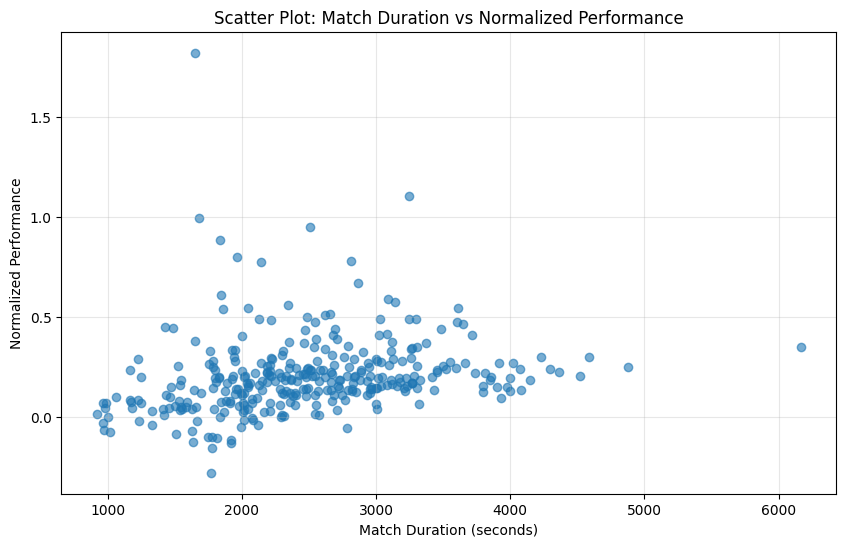

In [19]:
import matplotlib.pyplot as plt

# Check if data exists
if not all_data.empty:
    # Scatter plot of match duration vs normalized performance
    plt.figure(figsize=(10, 6))
    plt.scatter(all_data["duration"], all_data["normalized_performance"], alpha=0.6)
    plt.title("Scatter Plot: Match Duration vs Normalized Performance")
    plt.xlabel("Match Duration (seconds)")
    plt.ylabel("Normalized Performance")
    plt.grid(alpha=0.3)
    # Save the plot to the specified directory
    output_dir = "data/visuals"
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, "performance_duration_old_scatter.png"))
    plt.show()
else:
    print("No data available for visualization.")


### Testing Again
-By visualizing, I realized some extreme points in the x axis, I think we should ignore them since they can be considered as 'noisy data'

In [109]:
# Calculate the 99th quantile for match duration
quantile_99 = all_data["duration"].quantile(0.99)

# Filter the data for durations smaller than the 99th quantile
filtered_data = all_data[all_data["duration"] < quantile_99]

if not filtered_data.empty:
    # Extract relevant columns
    match_durations = filtered_data["duration"]
    performances = filtered_data["normalized_performance"]

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(match_durations, performances)

    # Display results
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
    print(f"P-value: {p_value:.6f}")

    # Interpret the result
    if p_value < 0.05:
        print("We reject the null hypothesis, There is a statistically significant correlation between match duration and performance.")
    else:
        print("We fail to reject the null hypothesis, There is no statistically significant correlation between match duration and performance.")
else:
    print("The filtered dataset is empty. Please check your CSV files.")

# Path for saving the output CSV
output_dir = "data/visualization_purposes"
output_csv = os.path.join(output_dir, "performance_with_duration_filtered.csv")  # Output file name

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the filtered data into the CSV
# Includes additional columns like `duration`, `gold_per_min`, and `xp_per_min`
filtered_data.to_csv(output_csv, index=False, columns=["normalized_performance", "duration"])


Pearson Correlation Coefficient: 0.2214
P-value: 0.000058
We reject the null hypothesis, There is a statistically significant correlation between match duration and performance.


In [84]:
print(len(all_data))

328


## 4- Performance change within one seat for playing analysis

In [106]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Path to the directory containing match CSV files
match_dir = "data/parsed_data/my_matches_csv"
csv_files = glob.glob(os.path.join(match_dir, "*.csv"))

# Combine all CSV files into a single DataFrame
all_data = pd.DataFrame()
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    match_data = pd.read_csv(csv_file)
    all_data = pd.concat([all_data, match_data], ignore_index=True)

# Step 1: Define sessions based on a time threshold (e.g., 1 hour gap between matches ends a session)
time_threshold = 3600  # 1 hour in seconds
all_data["start_time"] = pd.to_datetime(all_data["start_time"], unit="s")  # Convert to datetime
all_data = all_data.sort_values(by="start_time")  # Sort by time
all_data["session_id"] = (all_data["start_time"].diff().dt.total_seconds() > time_threshold).cumsum()  # Assign session IDs

# Step 2: Add match numbers within each session
all_data["session_match_number"] = all_data.groupby("session_id").cumcount() + 1


# Define the output directory and file name
output_dir = "data/visualization_purposes"
output_file = os.path.join(output_dir, "session_analysis.csv")

# get average performance for each hero
hero_avg_performance_path = "data/hero_average_performance.csv"
hero_avg_performance_df = pd.read_csv(hero_avg_performance_path)

# Create a dictionary for quick lookup of average performance by hero_id
hero_avg_performance_dict = hero_avg_performance_df.set_index('Hero ID')['average_normalized_performance'].to_dict()

# Define a function to label performance as 'good' or 'bad'
def label_performance(row):
    hero_id = row['my_hero_id']
    avg_performance = hero_avg_performance_dict.get(hero_id, 0)
    return 'good' if row['normalized_performance'] > avg_performance else 'bad'

# Define a function to label result as 'win' or 'loss'
def label_game_status(row):
    return 'win' if row['player_win'] == 1 else 'loss'

# Apply the function to create a new column
all_data['performance_label'] = all_data.apply(label_performance, axis=1)
all_data['result'] = all_data.apply(label_game_status, axis=1)

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the updated DataFrame to the CSV file
all_data.to_csv(output_file, index=False, columns=["session_id", "session_match_number", "start_time", "normalized_performance", "performance_label", "result"])

print(f"Processed session analysis data has been saved to: {output_file}")



Processing file: data/parsed_data/my_matches_csv/my_matches_batch_2.csv
Processing file: data/parsed_data/my_matches_csv/my_matches_batch_1.csv
Processed session analysis data has been saved to: data/visualization_purposes/session_analysis.csv


In [101]:
# Filter the data for good and bad performance labels
df_session = all_data[(all_data["performance_label"] == "good") | (all_data["performance_label"] == "bad")]

# Group by session_match_number and performance_label, then count occurrences
df_session = df_session.groupby(by=["session_match_number", "performance_label"]).size().unstack()
df_session.fillna(0, inplace=True)

# Merge session_match_number greater than 3 into session_match_number 3
df_session.loc[3] += df_session[df_session.index > 3].sum()
df_session = df_session[df_session.index <= 3]

# Rename session_match_number 3 to 3+
df_session.rename(index={15: '15+'}, inplace=True)

# Print total bads and total goods
total_bads = df_session['bad'].sum()
total_goods = df_session['good'].sum()
print(f"Total bads: {total_bads}")
print(f"Total goods: {total_goods}")

# Display the updated contingency table
df_session

Total bads: 183
Total goods: 145


performance_label,bad,good
session_match_number,,
1,115,88
2,49,42
3,19,15


In [102]:
import numpy as np

rows = df_session.index.tolist()
columns = df_session.columns.tolist()
real_vals = df_session.values
row_total = real_vals.sum(axis=1)
column_total = real_vals.sum(axis=0)
expected_vals = np.outer(row_total, column_total) / real_vals.sum()
expected_vals

array([[113.25914634,  89.74085366],
       [ 50.77134146,  40.22865854],
       [ 18.9695122 ,  15.0304878 ]])

In [103]:
from scipy.stats import chi2

chi_square_statistic = (((real_vals-expected_vals)**2)/expected_vals).sum()
print(f"Chi-Square Statistic: {chi_square_statistic}")

R = real_vals.shape[0]
C = real_vals.shape[1]
df = (R-1)*(C-1)
print(f"Degree of Freedom: {df}")

pval = chi2.sf(chi_square_statistic, df)
print(f"P-Value: {pval}")

if pval < 0.05:
  print("Reject the null hypothesis, there is a significant relationship between session_match_number and performance label")
else:
  print("Fail to reject null hypothesis, there is no significant relationship between session_match_number and performance label")

Chi-Square Statistic: 0.20043399342094348
Degree of Freedom: 2
P-Value: 0.9046410925944919
Fail to reject null hypothesis, there is no significant relationship between session_match_number and performance label
